In [1]:
import sqlite3
import pandas
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('words.db')
cur = conn.cursor()

## Матрицы

In [3]:
def make_matrix(l):
    matrix = {}
    for i in range(len(l)):
        matrix[l[i]] = {}
        for j in range(len(l)):
            matrix[l[i]][l[j]] = 0
    return matrix

In [4]:
def fill_matrix(matrix, d):
    for word in d.keys():
        case = d[word]
        for i in range(len(case)):
            first = case[i]
            for j in range(len(case)):
                second = case[j]
                matrix[first][second] += 1
    return matrix

In [5]:
def make_df(l):
    p = {}
    for c in l:
        p[c] = [0 for c in l]
    df = pandas.DataFrame(p)
    df.index = l
    return df

In [6]:
def fill_df(df, matrix, l):
    for i in l:
        for j in l:
            df.at[i, j] = matrix[i][j]
    return df

In [7]:
def color_reds(value):
    if value == 0:
        i = 0
    else:
        i = value // 500
    color = color_list[i]

    return 'background-color: %s' % color

In [8]:
def matrix_to_df(l, d):
    df = fill_df(make_df(l), fill_matrix(make_matrix(l), d), l)  
    return df.style.applymap(color_reds)

In [9]:
def matrix_to_df_uncolored(l, d):
    df = fill_df(make_df(l), fill_matrix(make_matrix(l), d), l)  
    return df

### Матрица падежей

In [10]:
cases = {'nomn', 'gent', 'datv', 'accs', 'ablt', 'loct', 'voct', 'gen2', 'acc2','loc2'}
cases_l = list(cases)

In [11]:
cur.execute('''
    select word, GROUP_CONCAT(tag, '+')
    from pos_tag_lemma
    where pos = 'NOUN'
    group by word''')
lines = cur.fetchall()

In [12]:
words_and_cases = {}
for word in lines:
    words_and_cases[word[0]] = []
    for tag in word[1].split('+'):
        words_and_cases[word[0]].append(list(cases&set(tag.split()))[0])
    words_and_cases[word[0]] = list(set(words_and_cases[word[0]]))

In [13]:
color_list = ['#E6E6FA', '#D8BFD8', '#DDA0DD', '#EE82EE', '#DA70D6', 
              '#FF00FF', '#BA55D3', '#9370DB', '#8A2BE2', 
              '#9400D3', '#9932CC','#8B008B', '#800080']

In [14]:
matrix_to_df_uncolored(cases_l, words_and_cases)

,loc2,voct,nomn,ablt,loct,accs,gent,acc2,gen2,datv
loc2,38,0,9,2,9,16,9,0,12,38
voct,0,12,8,1,1,12,12,0,0,1
nomn,9,8,5493,600,1022,4181,2515,0,0,999
ablt,2,1,600,1556,619,599,622,0,0,651
loct,9,1,1022,619,2372,1057,1186,0,0,1419
accs,16,12,4181,599,1057,5416,3171,0,5,1044
gent,9,12,2515,622,1186,3171,4984,0,0,1111
acc2,0,0,0,0,0,0,0,0,0,0
gen2,12,0,0,0,0,5,0,0,16,16
datv,38,1,999,651,1419,1044,1111,0,16,2049


### Матрица частей речи

In [15]:
list_of_pos = ['NOUN', 'ADJF', 'ADJS', 'COMP', 'VERB', 'INFN', 'PRTF', 'PRTS', 'GRND', 'NUMR', 'ADVB', 'NPRO', 'PRED', 'PREP', 'CONJ', 'PRCL', 'INTJ']
list_of_pos = sorted(list_of_pos)

In [16]:
cur.execute('''
            select pos_tag_lemma.word, GROUP_CONCAT(pos, ', ')
            from pos_tag_lemma
            join main on main.word = pos_tag_lemma.word
            where pos_tag_lemma.pos is not null
            group by pos_tag_lemma.word
            order by freq DESC
            limit 0, 10000''')
lines = cur.fetchall()

In [17]:
def make_word_pos_d(lines):
    word_pos_d = {}
    for line in lines:
        word_pos_d[line[0]] = list(set(line[1].split(', ')))
    return word_pos_d

In [18]:
final = matrix_to_df_uncolored(list_of_pos, make_word_pos_d(lines))

In [19]:
final

,ADJF,ADJS,ADVB,COMP,CONJ,GRND,INFN,INTJ,NOUN,NPRO,NUMR,PRCL,PRED,PREP,PRTF,PRTS,VERB
ADJF,1718,3,3,2,4,3,0,0,249,24,0,4,0,0,122,0,5
ADJS,3,249,143,0,20,0,0,0,46,1,4,13,8,3,0,34,9
ADVB,3,143,302,4,38,0,0,1,42,4,9,25,3,24,0,2,10
COMP,2,0,4,22,2,0,0,0,4,0,0,2,0,2,0,0,0
CONJ,4,20,38,2,89,1,1,7,16,2,2,26,2,6,0,1,8
GRND,3,0,0,0,1,45,0,0,9,0,0,1,0,4,0,0,0
INFN,0,0,0,0,1,0,379,1,6,0,0,0,0,0,0,0,3
INTJ,0,0,1,0,7,0,1,14,3,0,0,7,1,3,0,0,1
NOUN,249,46,42,4,16,9,6,3,6009,4,2,17,1,19,18,0,73
NPRO,24,1,4,0,2,0,0,0,4,69,0,4,0,0,0,0,0


### То же самое в процентах

In [20]:
def color_reds_2(value):
    color_list = ['#FDEBD0', '#FAD7A0', '#F8C471', '#F5B041', 
                  '#F39C12', '#E67E22', '#D35400', '#A93226', 
                  '#922B21', '#922B21']
    if value <= 3:
        i = 0
    elif value >= 90:
        i = 9
    else:
        i = int(value // 10 + 1)
    color = color_list[i]

    return 'background-color: %s' % color

In [21]:
def make_df_float(l):
    p = {}
    for c in l:
        p[c] = [0.0 for c in l]
    df = pandas.DataFrame(p)
    df.index = l
    return df

In [22]:
procent = make_df_float(list_of_pos)

In [23]:
for index, row in final.iterrows(): # sum of row is 100%
    s = sum(row)
    for pos in list_of_pos:
        new = '{:.2f}'.format(final.at[index, pos]/s*100)
        procent.at[index, pos] = new

In [24]:
procent.style.applymap(color_reds_2)\
                .format("{:.2f}")

,ADJF,ADJS,ADVB,COMP,CONJ,GRND,INFN,INTJ,NOUN,NPRO,NUMR,PRCL,PRED,PREP,PRTF,PRTS,VERB
ADJF,80.39,0.14,0.14,0.09,0.19,0.14,0.00,0.00,11.65,1.12,0.00,0.19,0.00,0.00,5.71,0.00,0.23
ADJS,0.56,46.72,26.83,0.00,3.75,0.00,0.00,0.00,8.63,0.19,0.75,2.44,1.50,0.56,0.00,6.38,1.69
ADVB,0.49,23.44,49.51,0.66,6.23,0.00,0.00,0.16,6.89,0.66,1.48,4.10,0.49,3.93,0.00,0.33,1.64
COMP,5.26,0.00,10.53,57.89,5.26,0.00,0.00,0.00,10.53,0.00,0.00,5.26,0.00,5.26,0.00,0.00,0.00
CONJ,1.78,8.89,16.89,0.89,39.56,0.44,0.44,3.11,7.11,0.89,0.89,11.56,0.89,2.67,0.00,0.44,3.56
GRND,4.76,0.00,0.00,0.00,1.59,71.43,0.00,0.00,14.29,0.00,0.00,1.59,0.00,6.35,0.00,0.00,0.00
INFN,0.00,0.00,0.00,0.00,0.26,0.00,97.18,0.26,1.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77
INTJ,0.00,0.00,2.63,0.00,18.42,0.00,2.63,36.84,7.89,0.00,0.00,18.42,2.63,7.89,0.00,0.00,2.63
NOUN,3.82,0.71,0.64,0.06,0.25,0.14,0.09,0.05,92.19,0.06,0.03,0.26,0.02,0.29,0.28,0.00,1.12
NPRO,22.22,0.93,3.70,0.00,1.85,0.00,0.00,0.00,3.70,63.89,0.00,3.70,0.00,0.00,0.00,0.00,0.00


## Топ совпадений частей речи по тысячам

In [25]:
colors = ['#4DD0E1', '#4DB6AC', '#81C784', '#AED581', 
          '#FFF176', '#FFD54F', '#FFB74D', '#FF8A65', 
          '#A1887F', '#90A4AE', '#E53935', 
          '#8E24AA', '#3949AB', '#039BE5', '#00897B', 
          '#7CB342', '#FDD835', '#FB8C00']

In [26]:
def get_lines_pos_col(left):    
    cur.execute('''
            select pos_tag_lemma.word, GROUP_CONCAT(pos, ', ')
            from pos_tag_lemma
            join main on main.word = pos_tag_lemma.word
            where pos_tag_lemma.pos is not null
            group by pos_tag_lemma.word
            order by freq DESC
            limit ''' + str(left) + ', ' + str(1000))
    lines = cur.fetchall()
    return lines

In [27]:
def get_top(lines, top):
    l = []
    for line in lines:
        k = list(set(line[1].split(', ')))
        if len(k) != 1:
            for i in range(len(k)-1):
                for j in range(i+1, len(k)):
                    line = k[i] + ' '+ k[j]
                    l.append(line)
    cnt = Counter(l).most_common(top)
    cnt2 = {c[0]:c[1] for c in cnt}
    s = len(l)
    for key in cnt2.keys():
        cnt2[key] = cnt2[key]/s
    return cnt2

In [28]:
def get_df(top):
    a = {}
    for i in range(0, 10000, 1000):
        lines = get_lines_pos_col(i)
        a[i] = get_top(lines, top)
    df = pandas.DataFrame.from_dict(a).transpose().fillna(0)
    return df

In [29]:
def draw_thing(df, top):
    x = range(0, 10000, 1000)
    y = [list(df[column]) for column in df.columns]
    labels = df.columns


    plt.stackplot(x, y, colors=colors, labels=labels)
    plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
    plt.margins(0,0)
    plt.title('Топ-' + str(top) + ' совпадений частей речи в тысячах')
    plt.show()

In [30]:
def m(top):
    df = get_df(top)
    draw_thing(df, top)

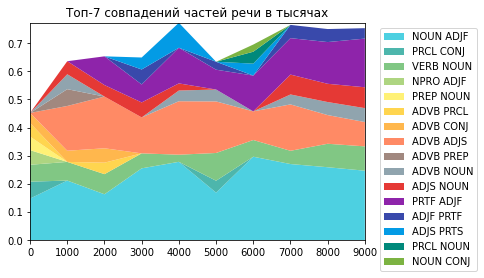

In [31]:
m(7)